<a href="https://colab.research.google.com/github/eshraongithub/DengAI-Predicting-Disease-Spread-ES/blob/main/1_DengAI_Predicting_Disease_Spread_Exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  El Problema

Vamos a utilizar los datos de la competición de predicción de los datos del Dengue. Mas información en [enlace](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

El objetivo de esta actividad es utilizar técnicas de aprendizaje no supervisado para realizar una exploración preliminar de los datos y extraer conclusiones a partir de elementos descartables, etc.


# Setting Preliminares

Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas.

Importamos las librerías incluido el paquete de visualización de datos estadísticos basado en Matplotlib "seaborn" para hacer gráficos a partir de nuestros datos.

In [ ]:
# carga de datos
import pandas as pd
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

# Carga de Datos

En primer lugar cargamos los datos del archivo **dengue_features_train.csv** dentro del entorno con las funcionalidades que nos permite Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dengue_features_train.csv to dengue_features_train.csv


Subimos los datos de entrenamiento sin campo objetivo (dengue_features_train)


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded['dengue_features_train.csv']))

Revisamos el número de filas y columnas que tenemos en nuestro DataFrame principal

In [ ]:
train.shape

(1456, 24)

Mostramos las 5 primeras filas de nuestro DataFrame principal

# Exploración de datos

Exploramos nuestros datos usando los métodos .info(), .describe(), .head()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [ ]:
train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [ ]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


Los datos muestran las observaciones climáticas medidas por estaciones meteorológicas así como índices de diferencia normalizada de vegetación (ndvi), que son indicadores que se pueden utilizar para analizar mediciones de teledetección, a menudo desde una plataforma espacial, evaluando si el objetivo que se observa contiene o no vegetación verde viva.

Calculamos el porcentaje de valores nulos por característica y creamos un mask para eliminar las características con un porcentaje de valores nulos por encima del 10%.

In [ ]:
train.isna().sum() / len(train)

city                                     0.000000
year                                     0.000000
weekofyear                               0.000000
week_start_date                          0.000000
ndvi_ne                                  0.133242
ndvi_nw                                  0.035714
ndvi_se                                  0.015110
ndvi_sw                                  0.015110
precipitation_amt_mm                     0.008929
reanalysis_air_temp_k                    0.006868
reanalysis_avg_temp_k                    0.006868
reanalysis_dew_point_temp_k              0.006868
reanalysis_max_air_temp_k                0.006868
reanalysis_min_air_temp_k                0.006868
reanalysis_precip_amt_kg_per_m2          0.006868
reanalysis_relative_humidity_percent     0.006868
reanalysis_sat_precip_amt_mm             0.008929
reanalysis_specific_humidity_g_per_kg    0.006868
reanalysis_tdtr_k                        0.006868
station_avg_temp_c                       0.029533


Creamos un mask booleano sobre si cada característica tiene menos del 10% de valores nulos.
Aplicamos el mask a school_df para seleccionar columnas con un porcentaje de valores nulos por encima de ese porcentaje y bajamos el número de característica de 24 a 23.

In [ ]:
# Create a boolean mask on whether each feature less than 10% missing values.
mask = train.isna().sum() / len(train) < 0.10

# Create a reduced dataset by applying the mask
reduced_train = train.loc[:, mask]

print(train.shape)
print(reduced_train.shape)

(1456, 24)
(1456, 23)


Separamos los datos de cada ciudad en dos Dataframes (uno por ciudad)

In [ ]:
train_sj = reduced_train[reduced_train['city'].str.contains("sj")]
train_iq = reduced_train[reduced_train['city'].str.contains("iq")]

In [ ]:
train_sj.head()

,city,year,weekofyear,week_start_date,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [ ]:
train_iq.head()

,city,year,weekofyear,week_start_date,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,iq,2000,26,2000-07-01,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,iq,2000,27,2000-07-08,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,iq,2000,28,2000-07-15,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,iq,2000,29,2000-07-22,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,iq,2000,30,2000-07-29,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0


# Preproceso

Aquí irían todas las funciones y transformaciones que permitieran el uso de las variables en los siguientes clasificadores, por ejemplo la transformación de las variables categóricas en numéricas, etc.

In [ ]:
train_sj= train_sj[train_sj.columns.difference(['city', 'week_start_date'])]

train_sj.head()

,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,weekofyear,year
0,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,18,1990
1,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,19,1990
2,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,20,1990
3,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,21,1990
4,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,22,1990


In [ ]:
train_iq= train_sj[train_sj.columns.difference(['city', 'week_start_date'])]

train_iq.head()

,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,weekofyear,year
0,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,18,1990
1,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,19,1990
2,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,20,1990
3,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,21,1990
4,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,22,1990


In [ ]:
pd.isnull(train_sj).any()

ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_temp_c                        True
station_precip_mm                         True
weekofyear                               False
year                                     False
dtype: bool

In [ ]:
pd.isnull(train_iq).any()

ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_temp_c                        True
station_precip_mm                         True
weekofyear                               False
year                                     False
dtype: bool

Los vamos a procesar de forma automática completandolos con el método ffill (con el valor previo)

In [ ]:
# ffill: propagate last valid observation forward to next valid backfill
train_sj.fillna(method='ffill', inplace=True)
pd.isnull(train_sj).any()

ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
weekofyear                               False
year                                     False
dtype: bool

In [ ]:
# ffill: propagate last valid observation forward to next valid backfill
train_iq.fillna(method='ffill', inplace=True)
pd.isnull(train_iq).any()

ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
weekofyear                               False
year                                     False
dtype: bool

### Exploramos nuestros datos calculando estadísticas de resumen simples. Este proceso, llamado análisis exploratorio de datos, es un primer paso crucial en el análisis estadístico de datos.

Establecemos el estilo predeterminado de Seaborn y trazamos un histograma de la temperatura media y vemos que la mayoría de las observaciones en San Juan e Iquitos se han registrado con temperatura de 28 y 27 grados centígrados respectivamente.

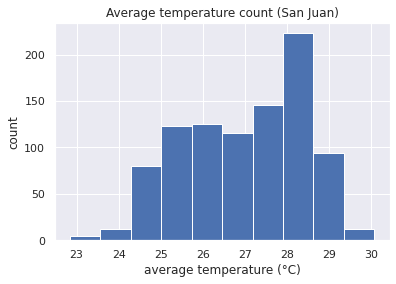

In [ ]:
sns.set()
_ = plt.hist(train_sj['station_avg_temp_c']) 
_ = plt.xlabel('average temperature (°C)') 
_ = plt.ylabel('count')
_ = plt.title('Average temperature count (San Juan)') 
plt.show()

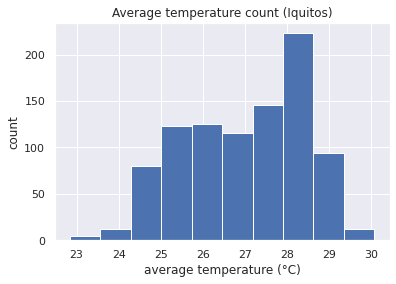

In [ ]:
sns.set()
_ = plt.hist(train_iq['station_avg_temp_c']) 
_ = plt.xlabel('average temperature (°C)') 
_ = plt.ylabel('count')
_ = plt.title('Average temperature count (Iquitos)')  
plt.show()

# StandardScaler

Como consideración previa necesitamos transformar los datos a una misma escala, para conseguir clustering efectivo. Las diferentes variables de nuestros datos pueden tener ordenes de dimensión diferentes.
En el clustering de KMeans, la varianza de una característica corresponde a su influencia sobre el algoritmo de clustering. Para dar oportunidad a cada característica, los datos deben transformarse para que las características tengan la misma varianza. Estos puede conseguir usando StandardScaler de scikit-learn que transforma cada característica para que tenga una media de 0 y una varianza de 1. Las características estandarizadas resultantes pueden ser muy informativas.

Importamos StandardScaler de sklearn y creamos un objeto de StandardScaler y le hacemos fitting a nuestros datos una vez con los datos de San Juan y otra con los datos de Iguitos.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_sj)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_sj =  scaler.transform(train_sj)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_iq)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_iq =  scaler.transform(train_iq)

# Análisis de Componentes Principales

La reducción de dimensiones resume un conjunto de datos utilizando sus patrones comunes. La técnica de reducción de dimensión más fundamental es el "Análisis de componentes principales" ("PCA"). El PCA se utiliza a menudo antes del aprendizaje supervisado para mejorar el rendimiento y la generalización del modelo. También puede resultar útil para el aprendizaje no supervisado.

Aplicamos el PCA a los datos de cada ciudad por separado y hacemos un gráfico de las variaciones de las características PCA para sacar su intrinsic dimension, y vemos que los componentes PCA 0, 1 y 2 de las dos ciudades tienen una varianza significativa.


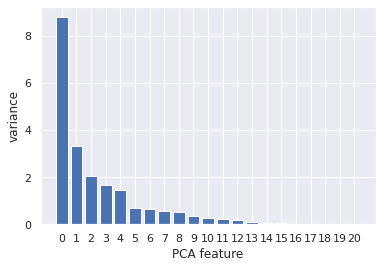

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca_sj = PCA ()
pipeline = make_pipeline(scaler, pca_sj)
pipeline.fit(scaled_sj)
features = range(pca_sj.n_components_)
plt.bar(features, pca_sj.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

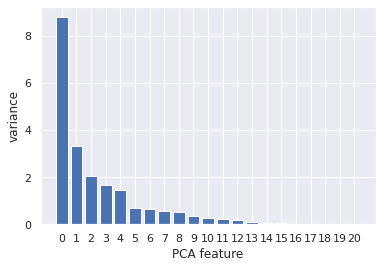

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca_iq = PCA ()
pipeline = make_pipeline(scaler, pca_iq)
pipeline.fit(scaled_iq)
features = range(pca_iq.n_components_)
plt.bar(features, pca_iq.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Calculamos la suma acumulada de la proporción de varianza por número de componentes utilizando el método de pca.explained_variance_ratio_ y vemos que con los primeros 5 componentos nos quedaremos con aproximadamente el 82% de la varianza explicada.

In [ ]:
# Print the cumulative sum of the explained variance ratio
print(pca_sj.explained_variance_ratio_.cumsum())

[0.41835804 0.57667435 0.67383144 0.75374424 0.82388948 0.8567996
 0.88739071 0.91444059 0.93908784 0.95631722 0.96986102 0.97957501
 0.98855082 0.99407869 0.99665473 0.99854246 0.99979135 0.99993776
 0.99999616 1.         1.        ]


In [ ]:
# Print the cumulative sum of the explained variance ratio
print(pca_iq.explained_variance_ratio_.cumsum())

[0.41835804 0.57667435 0.67383144 0.75374424 0.82388948 0.8567996
 0.88739071 0.91444059 0.93908784 0.95631722 0.96986102 0.97957501
 0.98855082 0.99407869 0.99665473 0.99854246 0.99979135 0.99993776
 0.99999616 1.         1.        ]


Ajustamos el modelo PCA de cada ciudad a un número de componentes= 5 y vemos que hemos reducido el número de dimensiones de 22 a 3.

In [ ]:
pca_sj = PCA(n_components=5)
pca_sj.fit(scaled_sj)
pca_sj_features = pca_sj.transform(scaled_sj)
pca_sj_features

array([[ 4.43538167, -0.0651831 ,  1.00760218, -0.34251432,  0.24251123],
       [ 1.77478599, -0.06266832,  1.24299448, -1.0496979 , -0.39928506],
       [ 0.10375023,  0.86940286,  1.81581552, -0.94347789, -0.43168307],
       ...,
       [ 4.04873173,  1.275066  , -2.2858636 ,  0.50040505, -0.7602943 ],
       [ 4.41520106, -0.84868513, -1.8797962 ,  1.61625301, -0.03575327],
       [ 1.36871672, -1.88818006, -2.84731279, -1.73769548,  1.3115663 ]])

In [ ]:
pca_iq = PCA(n_components=5)
pca_iq.fit(scaled_iq)
pca_iq_features = pca_iq.transform(scaled_iq)
pca_iq_features

array([[ 4.43538167, -0.0651831 ,  1.00760218, -0.34251432,  0.24251123],
       [ 1.77478599, -0.06266832,  1.24299448, -1.0496979 , -0.39928506],
       [ 0.10375023,  0.86940286,  1.81581552, -0.94347789, -0.43168307],
       ...,
       [ 4.04873173,  1.275066  , -2.2858636 ,  0.50040505, -0.7602943 ],
       [ 4.41520106, -0.84868513, -1.8797962 ,  1.61625301, -0.03575327],
       [ 1.36871672, -1.88818006, -2.84731279, -1.73769548,  1.3115663 ]])

A continuación, se muestra el porcentaje de varianza explicado por cada uno de los componentes seleccionados para cada ciudad (pca_sj y pca_iq).

In [ ]:
pca_sj_df= pd.DataFrame(np.matrix.transpose(pca_sj.components_), columns=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5'], index=train_sj.columns)

In [ ]:
pca_iq_df= pd.DataFrame(np.matrix.transpose(pca_iq.components_), columns=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5'], index=train_iq.columns)

# Clustering

Vamos a usar dos técnicas de clustering populares: clustering jerárquico y k-means.

## Clustering Jerárquico

A continuación, ejecutemos un algoritmo de clustering jerárquico con el fin de observar como se pueden están organizados los elementos que están bajo estudio.
El clustering jerárquico trata de ayudarnos a responder a una pregunta importante: cuántos clústeres están presentes en nuestros datos.

En primer lugar vamos a calcular la matriz de similitud entre los diferentes elementos utilizando para ello la distancia euclídea y la visualizamos utilizando la librería seaborn y el gráfico de calor para cada ciudad.

### Gráfico de calor para San Juan

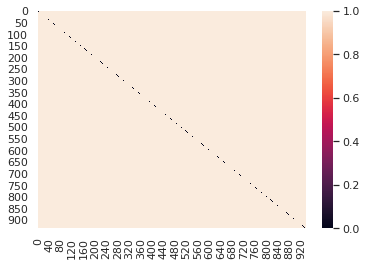

In [ ]:
import sklearn.neighbors
dist_sj = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim_sj = dist_sj.pairwise(scaled_sj)

import seaborn as sns; sns.set()
ax_sj = sns.heatmap(matsim_sj,vmin=0, vmax=1)

### Gráfico de calor para Iquito

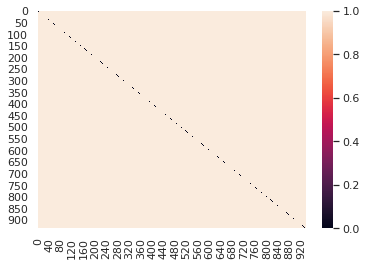

In [ ]:
import sklearn.neighbors
dist_iq = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim_iq = dist_iq.pairwise(scaled_iq)

import seaborn as sns; sns.set()
ax_iq = sns.heatmap(matsim_sj,vmin=0, vmax=1)

Una vez calculada la matriz de similitud pasamos a construir el dendrograma. Para ello hay que decidir que tipo de distancia intercluster utilizamos, lo cual dependerá del problema que tengamos que afrontar. En un extremo estará el enlace simple que permitirá manejar fácilmente elementos especiales (outliers) y clusters de muy diversa forma, pero que nos ofrecerá grupos poco balanceados. En el otro extremo el enlace completo nos ofrecerá agrupaciones más equlibradas pero que supondrán la división de grupos mayoritarios. De forma intermedia tendremos otros índices como Ward o Average para ver cómo se distribuyen los datos.

Importamos y usamos las librerías linkage, fcluster y cluster para aplicar el clustering jerárquico sobre los datos de cada ciudad por separado.

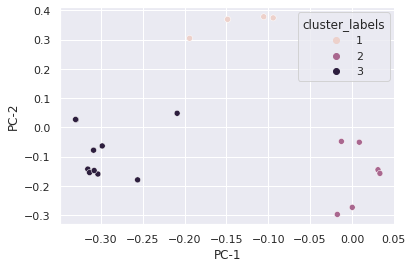

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix_sj = linkage(pca_sj_df[['PC-1', 'PC-2']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
pca_sj_df['cluster_labels'] = fcluster(distance_matrix_sj, 3, criterion = 'maxclust')

# Plot clusters
scatterplot_sj= sns.scatterplot(x='PC-1', y='PC-2', 
                hue='cluster_labels', data = pca_sj_df)
plt.show()

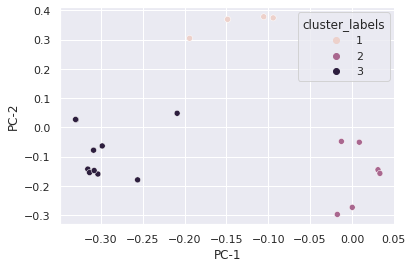

In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix_iq = linkage(pca_iq_df[['PC-1', 'PC-2']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
pca_iq_df['cluster_labels'] = fcluster(distance_matrix_iq, 3, criterion = 'maxclust')

# Plot clusters
scatterplot_iq= sns.scatterplot(x='PC-1', y='PC-2', 
                hue='cluster_labels', data = pca_iq_df)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


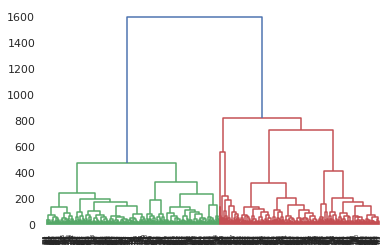

<Figure size 432x288 with 0 Axes>

In [ ]:
from scipy import cluster
clusters_sj = cluster.hierarchy.linkage(matsim_sj, method = 'ward')
cluster.hierarchy.dendrogram(clusters_sj, labels = train_sj.index)

f_sj = plt.figure()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


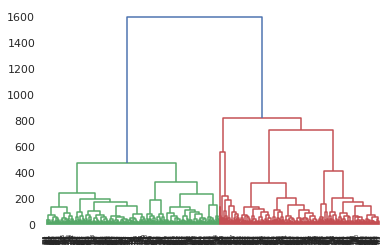

<Figure size 432x288 with 0 Axes>

In [ ]:
from scipy import cluster
clusters_iq = cluster.hierarchy.linkage(matsim_iq, method = 'ward')
cluster.hierarchy.dendrogram(clusters_iq, labels = train_iq.index)

f_iq = plt.figure()
plt.show()

Cortamos los dendogramas en el valor 700, donde aparece que los top 3 clusters tienen la mayor distancia entre ellos.

In [ ]:
cut = 700
labels_sj = cluster.hierarchy.fcluster(clusters_sj, cut , criterion = 'distance')

labels_sj

array([4, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       3, 4, 3, 3, 4, 3, 4, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 4, 4, 4,
       2, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 3, 1, 1, 1, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3,
       3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4,
       4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3,
       3, 1, 4, 3, 4, 4, 3, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 4, 3, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 4, 3, 3, 3, 4, 4,

In [ ]:
labels_iq = cluster.hierarchy.fcluster(clusters_iq, cut , criterion = 'distance')
labels_iq

array([4, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       3, 4, 3, 3, 4, 3, 4, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 4, 4, 4,
       2, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 3, 1, 1, 1, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3,
       3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4,
       4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3,
       3, 1, 4, 3, 4, 4, 3, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 4, 3, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 4, 3, 3, 3, 4, 4,

Una vez terminado el clustering jerárquico podemos aplicar ciertas métricas de calidad del mismo como el coeficiente Silohuette

In [ ]:
from sklearn import metrics
n_clusters_sj_ = len(set(labels_sj)) - (1 if -1 in labels_sj else 0)
print('Estimated number of clusters: %d' % n_clusters_sj_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(scaled_sj, labels_sj))

Estimated number of clusters: 4
Silhouette Coefficient: 0.184


In [ ]:
from sklearn import metrics
n_clusters_iq_ = len(set(labels_iq)) - (1 if -1 in labels_iq else 0)
print('Estimated number of clusters: %d' % n_clusters_iq_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(scaled_iq, labels_iq))

Estimated number of clusters: 4
Silhouette Coefficient: 0.184


## Clustering K-means

In [ ]:
# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions_sj = []
silhouettes_sj = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(pca_sj_features)
    distortions_sj.append(km.inertia_)
    silhouettes_sj.append(metrics.silhouette_score(pca_sj_features, labels))

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions_iq = []
silhouettes_iq = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(pca_iq_features)
    distortions_iq.append(km.inertia_)
    silhouettes_iq.append(metrics.silhouette_score(pca_iq_features, labels))

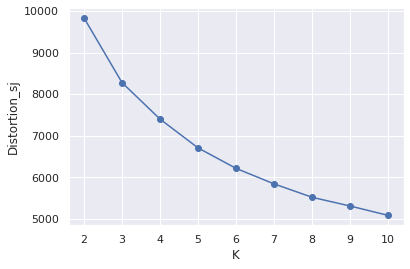

In [ ]:
plt.plot(range(2,11), distortions_sj, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion_sj')
plt.show()

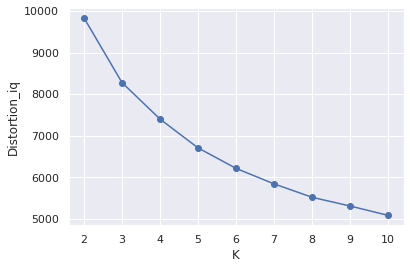

In [ ]:
plt.plot(range(2,11), distortions_iq, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion_iq')
plt.show()

In [ ]:
k = 3

km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

km_sj = km.fit_predict(pca_sj_features)
km_iq = km.fit_predict(pca_iq_features)

In [ ]:
from sklearn import metrics
print("Silhouette Coefficient for San Juan: %0.3f"
      % metrics.silhouette_score(scaled_sj, km_sj))
      
print('Distortion for San Juan: %.2f' % km.inertia_)

Silhouette Coefficient for San Juan: 0.268
Distortion for San Juan: 8279.12


In [ ]:
from sklearn import metrics
print("Silhouette Coefficient for San Juan: %0.3f"
      % metrics.silhouette_score(scaled_iq, km_iq))
      
print('Distortion for Iquitos: %.2f' % km.inertia_)

Silhouette Coefficient for San Juan: 0.268
Distortion for Iquitos: 8279.12


Visualizamos los clusters k-means con K= 3

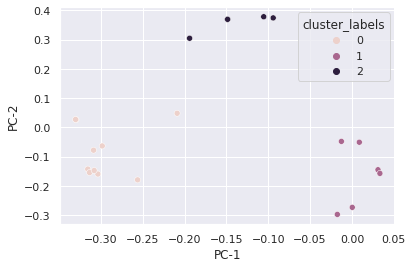

In [ ]:
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(pca_sj_df, 3)

# Assign cluster labels
pca_sj_df['cluster_labels'], _ = vq(pca_sj_df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='PC-1', y='PC-2', hue='cluster_labels', data=pca_sj_df)
plt.show()

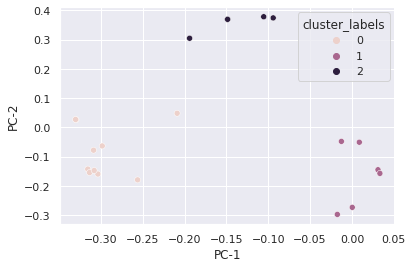

In [ ]:
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(pca_iq_df, 3)

# Assign cluster labels
pca_iq_df['cluster_labels'], _ = vq(pca_iq_df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='PC-1', y='PC-2', hue='cluster_labels', data=pca_iq_df)
plt.show()

# Selección de Características

Subimos los datos del archivo **dengue_labels_train** que únicamente nos proporcionan el número de casos de dengue para las semanas de entrenamiento.

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

train_labels = upload_files()
train_labels.head()

Saving dengue_labels_train.csv to dengue_labels_train.csv
User uploaded file "dengue_labels_train.csv" with length 19582 bytes


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


Mezclamos los dos conjuntos de datos para tenerlos en un único dataframe

In [ ]:
train_merged = pd.merge(train,train_labels,on=['city', 'year', 'weekofyear'])

train_merged.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Separamos los datos de cada ciudad.

In [ ]:
train_sj = train_merged.loc[train_merged.city=='sj']
train_iq = train_merged.loc[train_merged.city=='iq']

# Correlación entre variables

Con el fin de que obtener un mejor rendimiento en el algoritmo de clustering será necesario identificar aquellas variables que son redundantes, es decir, se puede asumir que representan lo mismo, en este caso se puede utilizar el análisis de correlaciones. 

Generamos un heatmap para cada ciudad usando la función de heatmap de Seaborn.

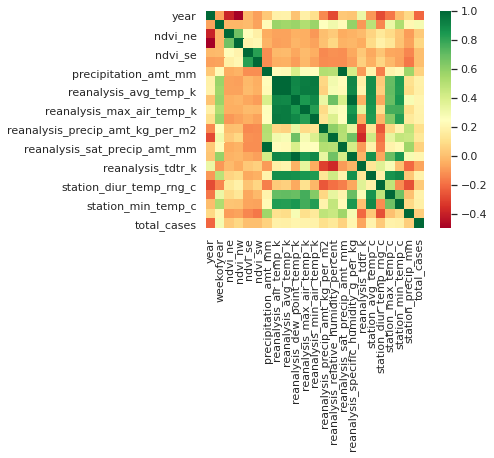

In [ ]:
sns.heatmap(train_sj.corr(), square=True, cmap='RdYlGn')

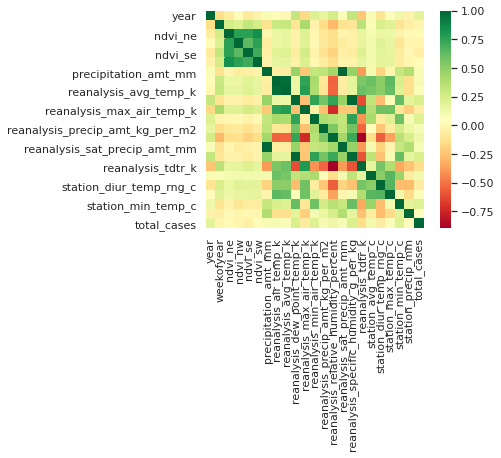

In [ ]:
sns.heatmap(train_iq.corr(), square=True, cmap='RdYlGn')

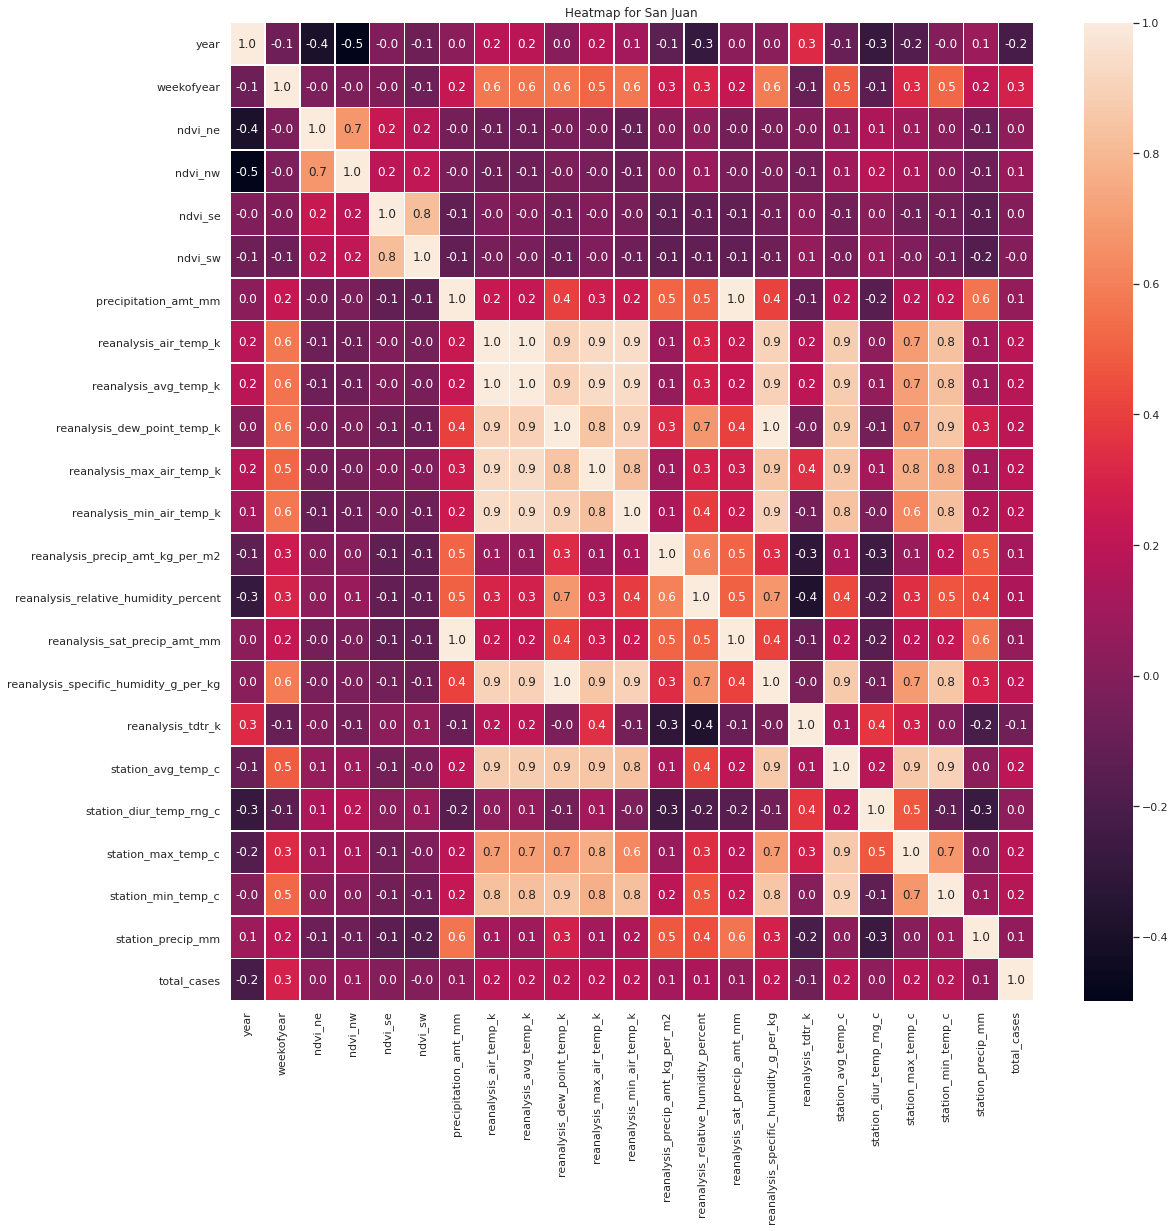

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_sj.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Heatmap for San Juan')
plt.show()

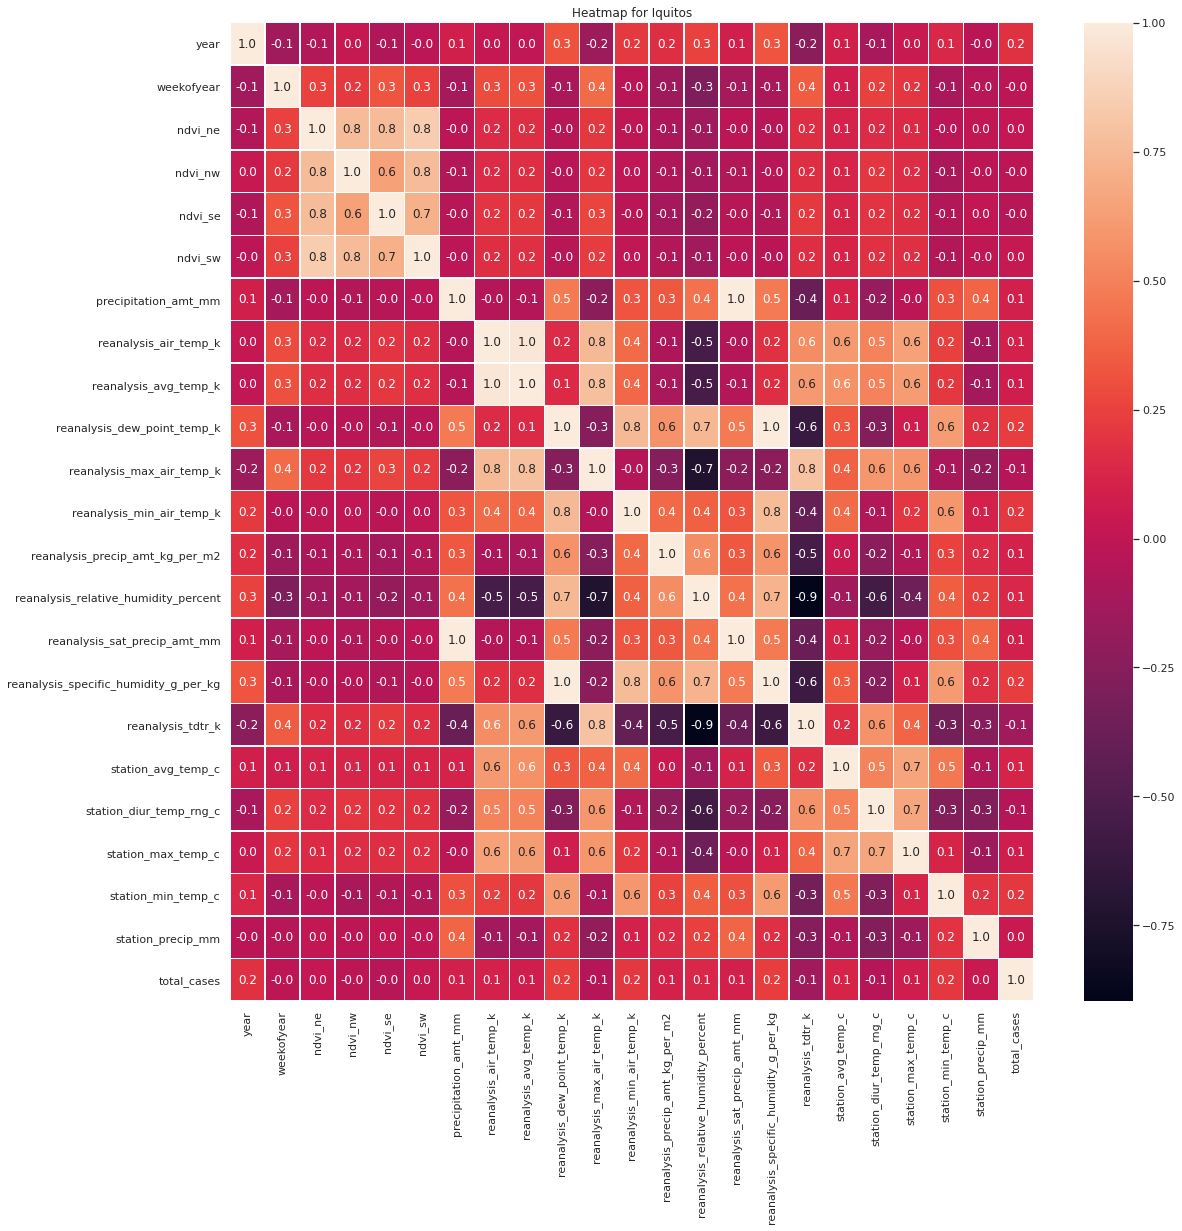

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_iq.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Heatmap for Iquitos')
plt.show()

Para ambas ciudades, **reanalysis_specific_humidity_g_per_kg**, **reanalysis_dew_point_temp_k** y **reanalysis_min_air_temp_k** son las variables que están más fuertemente correlacionadas con el total de casos y esto coincide con el hecho de que los mosquitos tienden a vivir en lugares con mucha humedad. Además, la temperatura está muy relacionada con la propagación de mosquitos, por lo que tiene sentido que esté relacionada con el total de casos. Sorprendentemente, en la ciudad de San Juan, la semana del año también está muy correlacionada, así que lo tendremos en cuenta.

Text(0.5, 1.0, 'Correlations for San Juan')

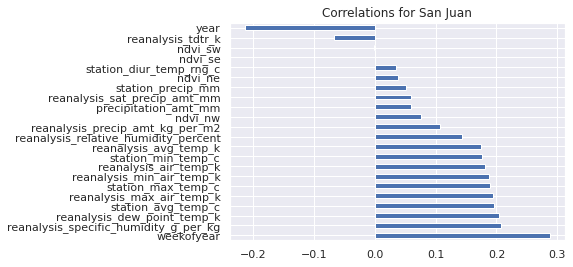

In [ ]:
sj_correlations = train_sj.corr()
iq_correlations = train_iq.corr()
(sj_correlations['total_cases'].drop('total_cases').sort_values(ascending=False).plot.barh())
plt.title('Correlations for San Juan')

Text(0.5, 1.0, 'Correlations for Iquitos')

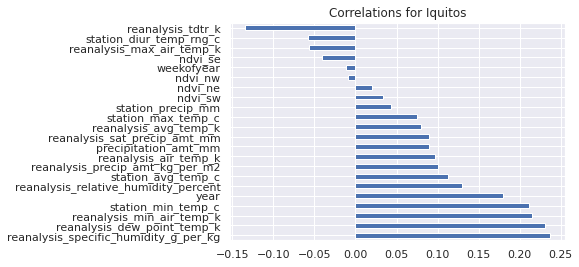

In [ ]:
(iq_correlations['total_cases'].drop('total_cases').sort_values(ascending=False).plot.barh())
plt.title('Correlations for Iquitos')

Vimos en los 4 gráficos anteriores que hay una relación altamente positiva entre **'reanalysis_specific_humidity_g_per_kg**', '**reanalysis_dew_point_temp_k**', '**reanalysis_min_air_temp_k**' y el número de casos de Dengue (en ambas ciudades). Por lo tanto, podemos elegir solo una de estas tres variables para evitar la maldición de la dimensionalidad, evitar overfitting en nuestro modelo y obtener resultados más precisos. En este caso vamos a usar solo 'reanalysis_dew_point_temp_k' en nuestro modelo.

Trataremos los valores perdidos.

Los vamos a procesar de forma automática completandolos con el método ffill (con el valor previo).

In [ ]:
pd.isnull(train_merged).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

In [ ]:
train_merged.fillna(method='ffill', inplace=True)
pd.isnull(train_merged).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

# t-SNE

t-SNE es una gran técnica para la exploración visual de conjuntos de datos de alta dimensión. La aplicaremos al conjunto de datos "train". Eliminaremos las columnas no numéricas de del conjunto de datos "train" y ajustaremos TSNE al conjunto de datos numéricos.
t-SNE redujo las más de 20 características que tenemos en el conjunto de datos de "train" a solo 2 que ahora podemos mostrar en un gráfico.

In [ ]:
from sklearn.manifold import TSNE

# Non-numerical columns in the dataset
non_numeric = ['city',	'week_start_date']

# Drop the non-numerical columns from df
train_numeric = train_merged.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
tsne = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = tsne.fit_transform(train_numeric)
print(tsne_features.shape)

(1456, 2)


Añadimos las caracteristicas generadas por t-SNEa nuestro data set original.

In [ ]:
train_merged['x'] = tsne_features[:,0]
train_merged['y'] = tsne_features[:,1]


Visualizamos un gráfico de dispersión usando las caracteristicas generadas por t-SNE y diferenciando los datos de cada ciudad por color. Vemos que los datos de cada ciudad forman un cluster diferente. ¡t-SNE encontró estas diferencias de ciudad sin que se los definamos explícitamente!

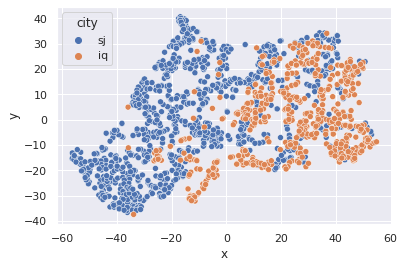

In [ ]:
sns.scatterplot(x="x", y="y", hue='city', data=train_merged)

plt.show()

Quitamos las caracteristicas que están altamente correlacionados.

In [ ]:
print("The original dataframe has {} columns.".format(train_merged.shape[1]))

# Calculate the correlation matrix and take the absolute value
corr_matrix = train_merged.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = train_merged.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The original dataframe has 27 columns.
The reduced dataframe has 25 columns.


# DBSCAN

Vamos a identificar elementos outliers mediante la utilización de DBSCAN. El propósito de identificar ouliter es aislar aquellas características que son diferentes a los demás y que nos pueden ayudar a distinguir a los diferentes elementos a los que representan.

### Preparación de datos para el DBSCAN

In [ ]:
train_dbscan = train
train_dbscan

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [ ]:
from numpy import transpose

train_dbscan.set_index(['city', 'week_start_date'])

train_dbscan.drop('week_start_date', axis=1, inplace=True)

train_dbscan = train_dbscan.set_index('city')

train_dbscan

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
city,,,,,,,,,,,,,,,,,,,,,,
sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iq,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
iq,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
iq,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4


In [ ]:
train_feat = transpose(train_dbscan)
train_feat

city,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,...,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq
year,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,...,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2010.0,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
weekofyear,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000,43.000000,44.000000,45.000000,46.000000,47.000000,48.000000,49.000000,50.000000,51.000000,52.000000,1.000000,2.000000,3.000000,4.000000,5.000000,...,39.000000,40.000000,41.000000,42.000000,43.000000,44.000000,45.000000,46.000000,47.000000,48.000000,49.000000,50.000000,51.000000,52.000000,53.0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000
ndvi_ne,0.122600,0.169900,0.032250,0.128633,0.196200,NaN,0.112900,0.072500,0.102450,NaN,0.192875,0.291600,0.150567,NaN,NaN,NaN,0.190233,0.252900,0.235400,0.127967,0.196350,0.116100,0.228550,0.171150,NaN,0.146200,0.252250,0.152600,0.290800,0.272200,0.136767,0.109800,0.121350,0.293133,0.302500,0.146500,NaN,NaN,0.331300,0.091700,...,0.294314,0.206300,0.232271,0.297414,0.296800,0.290757,0.388671,0.368871,0.407050,0.336114,0.348529,0.192200,0.217600,0.210422,NaN,0.124571,0.145286,0.252114,0.263271,0.170100,0.230757,0.293300,0.303657,0.127317,0.311729,0.294600,0.266286,0.141433,0.242843,0.157686,0.231486,0.239743,0.260814,0.168686,0.263071,0.342750,0.160157,0.247057,0.333914,0.298186
ndvi_nw,0.103725,0.142175,0.172967,0.245067,0.262200,0.174850,0.092800,0.072500,0.146175,0.121550,0.082350,0.211800,0.171700,0.247150,0.064333,0.128033,0.168800,0.330750,0.200025,0.437100,0.182433,0.260900,0.189750,0.067550,0.070200,0.089750,0.183433,0.181775,0.224600,0.330350,0.216525,0.088600,0.261660,0.266867,0.277233,0.140467,0.100467,0.293567,0.309333,0.246425,...,0.270671,0.255257,0.272500,0.282171,0.308486,0.237950,0.372817,0.379957,0.335100,0.287767,0.290400,0.193529,0.240300,0.257138,NaN,0.179129,0.142314,0.230486,0.230600,0.142117,0.189257,0.247829,0.260057,0.181160,0.292686,0.250971,0.301233,0.204729,0.272757,0.156614,0.294686,0.259271,0.255786,0.158500,0.272500,0.318900,0.160371,0.146057,0.245771,0.232971
ndvi_se,0.198483,0.162357,0.157200,0.227557,0.251200,0.254314,0.205071,0.151471,0.125571,0.160683,0.191943,0.301200,0.226900,0.379700,0.164443,0.206957,0.167657,0.264171,0.283817,0.123400,0.254829,0.199443,0.212486,0.179467,0.181617,0.128829,0.318000,0.178329,0.180386,0.131633,0.176786,0.266783,0.191386,0.260857,0.171267,0.151500,0.251900,0.259943,0.221029,0.243857,...,0.302071,0.279957,0.271571,0.255929,0.362300,0.317686,0.249900,0.380029,0.366500,0.325457,0.410614,0.239886,0.181771,0.221133,NaN,0.163843,0.135300,0.187329,0.218871,0.117914,0.163486,0.206629,0.225486,0.1

In [ ]:
# ffill: propagate last valid observation forward to next valid backfill
# Otra Opción: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate
train_feat.fillna(method='ffill', inplace=True)
pd.isnull(train_feat).any()

city
sj    False
sj    False
sj    False
sj    False
sj    False
      ...  
iq    False
iq    False
iq    False
iq    False
iq    False
Length: 1456, dtype: bool

In [ ]:
#1. Normalization of the data
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(train_feat)

#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 

Variance Ratio:  [0.99757218 0.00111355]


In [ ]:
# 2. Compute the similarity matrix
#http://docs.scipy.org/doc/scipy/reference/cluster.html
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)

### Parametrización

Vamos a fijar MinPts = 3 y observar qué epsilon podemos establecer

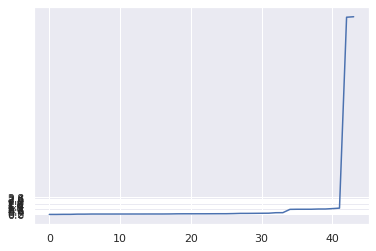

In [ ]:
minPts=2
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(train_feat, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 120, 10))
ax.set_yticks(np.arange(0, 3, 0.2))

plt.plot(seq)


plt.show()

Vamos a establecer un rango amplio de pruebas teniendo en cuenta que buscamos aislar elementos diferentes a los demás.

## Ejecución

In [ ]:
from sklearn.cluster import DBSCAN

for eps in np.arange(0.50, 1.8, 0.20):
  db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  
#labels

  0.50, 3, 4
  0.70, 3, 4
  0.90, 2, 2
  1.10, 2, 1
  1.30, 2, 1
  1.50, 2, 1
  1.70, 2, 1


Como podemos observar DBSCAN nos agrupa los elementos en un grupo y el resto son outliers. El número de outliers si es significativo tenerlo en cuenta, por lo que nos vamos a quedar con las parametrizaciones que nos ofrecen un mayor número de outliers.

In [ ]:
db = DBSCAN(eps=0.9, min_samples=minPts).fit(features_norm)
labels = db.labels_
labels

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0])

Visualizamos los resultados

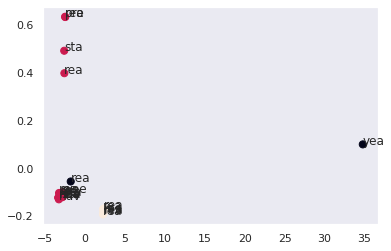

In [ ]:
names =  train_feat.index

#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 
plt.grid()
plt.show()

Identificamos aquellos elementos que son outliers.

In [ ]:
train_feat['dbscan_group'] = labels

train_feat[train_feat['dbscan_group'] == -1]

city,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,...,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq,dbscan_group
year,1990.000000,1990.000000,1990.000000,1990.000000,1990.00,1990.000000,1990.0,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.00,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.00,1990.00,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1991.000000,1991.000000,1991.0,1991.000000,1991.000000,...,2009.000000,2009.00,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2010.0,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.0,2010.00,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.0,2010.00,2010.00,2010.000000,-1
reanalysis_relative_humidity_percent,73.365714,77.368571,82.052857,80.337143,80.46,79.891429,82.0,83.375714,82.768571,81.281429,81.467143,82.144286,80.742857,80.584286,79.65,84.178571,80.947143,83.348571,77.172857,81.551429,81.637143,77.048571,78.52,84.11,85.621429,85.502857,82.787143,81.715714,75.728571,78.151429,81.385714,79.908571,68.722857,80.082857,69.681429,72.938571,76.628571,78.5,71.597143,71.784286,...,91.575714,89.31,79.222857,90.657143,93.808571,90.372857,84.311429,80.787143,89.594286,91.708571,87.752857,92.958571,96.885714,53.0,78.271429,89.807143,87.641429,91.798571,90.648571,96.515714,88.365714,94.915714,97.7,96.25,96.124286,93.082857,88.707143,95.182857,93.655714,95.995714,87.657143,96.712857,97.445714,78.998571,88.765714,91.6,94.28,94.66,89.082857,-1
